<center>

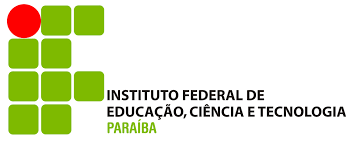

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: CONTROLE E AUTOMAÇÃO

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>

**Entrega 01**

<br>
<br>

Daniel Barbosa Vasconcelos

<center>

<br>
<br>
<br>

30 de outubro de 2025 <br>
Campina Grande, PB

In [1]:
!pip install control
!pip install tclab
from control import *
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import control as ctrl
import control as ctl
from scipy.signal import TransferFunction, impulse


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.2 MB/s eta 0:00:00


# Capítulo 4: Características de sistemas de controle com retroação


## 4.1 Sistemas de Controle a Malha Aberta e a Malha Fechada

Os sistemas de controle de **malha fechada** são aqueles que possuem **retroação (realimentação)**. Neles, o sinal de erro (referência desejada menos a resposta real do sistema) é gerado e utilizado para modular a ação de controle. Os sistemas de **malha aberta** não possuem retroação.

O diagrama básico de um sistema de malha fechada é composto por um controlador $D(s)$, uma Planta $G(s)$ e um elemento de realimentação $H(s)$.

O sinal de erro do sistema (desconsiderando $H(s)=1$ por simplificação) pode ser escrito por:

$$
E(s) = \frac{1}{1 + G(s)}R(s)
$$

* **Aplicações em Indústria 4.0:** A grande maioria dos sistemas de **Automação Industrial (Smart Factories)** opera em malha fechada (e.g., controle de temperatura PID, controle de posição de servomotores) para garantir a precisão exigida pelos padrões de qualidade e eficiência.

## 4.2 Sensibilidade de Sistemas de Controle a Variações de Parâmetros

Um sistema físico é sujeito a mudanças (envelhecimento, temperatura, desgaste), resultando em variações nos parâmetros da Planta $G(s)$. A principal vantagem da retroação é a sua capacidade de tornar o sistema **menos sensível** a essas variações.

#### **Sensibilidade do Sistema de Malha Aberta:**

A sensibilidade da Função de Transferência de Malha Aberta $T_{MA}(s) = G(s)$ é trivialmente:
$$
S_{G}^{T_{MA}} = \frac{\frac{\Delta T_{MA}(s)}{T_{MA}(s)}}{\frac{\Delta G(s)}{G(s)}} = 1
$$
* **Significado:** Qualquer variação percentual em $G(s)$ resulta na mesma variação percentual na saída $T_{MA}(s)$.

#### **Sensibilidade do Sistema de Malha Fechada:**

A sensibilidade da Função de Transferência de Malha Fechada $T_{MF}(s)$ em relação a $G(s)$ é definida por:
$$
S_G^{T_{MF}} = \frac{1}{1 + G(s)H(s)}
$$

* **Função de Transferência de Malha Fechada (geral):**
    $$
    T_{MF}(s) = \frac{G(s)}{1 + G(s)H(s)}
    $$

* **Explicação e Benefício:** Para que a sensibilidade seja baixa ($|S_G^{T_{MF}}| \ll 1$), o **Ganho de Malha $L(s) = G(s)H(s)$** deve ser grande em magnitude ($|L(s)| \gg 1$).
* **Aplicações em Indústria 4.0:** Esta baixa sensibilidade é crucial para a **Robustez do Sistema**. Em **Gêmeos Digitais**, ela assegura que o comportamento do ativo físico permaneça previsível e alinhado ao modelo digital, mesmo quando ocorre o **desgaste** natural dos componentes.




## 4.3 Controle da Resposta Transitória de Sistemas de Controle

A **Resposta Transitória** é o tempo que o sistema leva para alcançar e se estabilizar próximo ao seu valor final (incluindo métricas como Tempo de Subida $T_r$ e Tempo de Assentamento $T_s$).

* **Controle com Retroação:** Em sistemas de malha fechada, o ajuste da resposta transitória é realizado através da escolha dos parâmetros do controlador $D(s)$ (ganhos K, polos, zeros) ou do compensador $H(s)$, o que move a localização dos **polos de malha fechada** no plano $s$.
* **Aplicações em Indústria 4.0:** O controle da resposta transitória é essencial para a **Otimização de Processos (Eficiência)**. Em linhas de montagem rápidas ou robótica, um **Tempo de Assentamento ($T_s$)** mínimo é necessário para maximizar a **Taxa de Produção (Throughput)**.


## 4.4 Sinais de Perturbação em um Sistema de Controle com Retroação

Os **Sinais de Perturbação (Ruído)** $N(s)$ são entradas indesejadas que interferem no processo. Os sistemas de malha fechada são eficazes em dirimir o impacto desses sinais.

#### **Fórmula da Função de Transferência de Distúrbio**

A relação entre a saída $Y(s)$ e o Distúrbio $N(s)$ (com a referência $R(s)=0$) é dada por:

$$
\frac{Y(s)}{N(s)} = \frac{1}{1 + G(s)H(s)}
$$

* **Explicação e Benefício:** O impacto do distúrbio na saída é atenuado na mesma proporção da redução da sensibilidade. Novamente, um grande **Ganho de Malha $L(s) = G(s)H(s)$** é necessário para a **Rejeição de Distúrbio**.
* **Aplicações em Indústria 4.0:** Em **Veículos Guiados Autonomamente (AGVs)**, a retroação minimiza o efeito de pisos irregulares ou vento (distúrbios), garantindo que a rota planejada seja seguida com precisão, o que é crítico para a logística interna.

## 4.5 Erro de Estado Estacionário

O **Erro de Estado Estacionário** ($e_{ss}$) é o erro residual observado na saída do sistema após o término da resposta transitória e a estabilização.

#### **Fórmula do Erro de Estado Estacionário**

O $e_{ss}$ é obtido pelo Teorema do Valor Final aplicado ao sinal de erro $E(s)$:

$$
e_{ss} = \lim_{t \to \infty} e(t) = \lim_{s \to 0} s E(s)
$$

* **Controle com Retroação:** A malha fechada permite a inclusão de **Ação Integral** no controlador $D(s)$ para aumentar o **Tipo do Sistema** (número de integradores na malha aberta), o que anula o erro de estado estacionário para entradas em degrau e reduz para entradas em rampa.
* **Aplicações em Indústria 4.0:** Fundamental para **Qualidade Zero Defeito**. Em processos como injeção ou posicionamento de robôs, a anulação do $e_{ss}$ é mandatória para garantir que a especificação de projeto digital seja exatamente replicada no mundo físico.

## 4.6 O Custo da Retroação

Apesar das vantagens técnicas, a implementação da malha fechada acarreta custos e desafios:

1.  **Aumento da Complexidade:** Maior número de componentes (sensores, amplificadores, filtros, etc.), elevando o custo de hardware e a complexidade de manutenção.
2.  **Risco de Instabilidade:** Sistemas de malha fechada podem se tornar **instáveis** se o Ganho de Malha for muito alto, ou se o projeto do compensador for inadequado. A instabilidade é a principal desvantagem técnica.
3.  **Perda de Ganho:** O uso da retroação, embora benéfica, frequentemente resulta em uma **redução do ganho estático** global do sistema, o que precisa ser compensado pelo controlador.

Apesar destes custos, as vantagens de robustez, precisão e rejeição de distúrbios geralmente justificam o uso da retroação na maioria dos sistemas de engenharia modernos.

# 4.7 Exemplo de projeto: Veículo Explorador Autônomo (Sensibilidade)

O objetivo é comparar a sensibilidade do sistema de controle de um **Veículo Explorador de Marte** (ou um **AGV Industrial**) a variações no ganho do controlador $K$.

* **Função de Transferência Malha Aberta:** $T_o(s) = \frac{K}{s^2 + 4s + 5}$
* **Função de Transferência Malha Fechada:** $T_c(s) = \frac{K}{s^2 + 4s + 3 + K}$

**Sensibilidade para o Sistema de Malha Fechada é:**
$$
S_K^{T_c} = \frac{s^2 + 4s +3}{s^2 + 4s +3 + K}
$$

**A simulação demonstrará que a variação de $K$ afeta muito menos a resposta final do sistema de Malha Fechada.**



## 4.8 Exemplo de projeto: Rejeição de Perturbação em Sistema de Velocidade

O objetivo é ilustrar como a **retroação** é eficaz para **rejeitar distúrbios** $N(s)$ (como uma mudança de carga) em um sistema de controle de velocidade.

* **Função de Transferência de Distúrbio (Distúrbio para Saída, $Y(s)/N(s)$):**
$$
T_D(s) = \frac{1}{s^2 + 2s + 1 + K}
$$

**O Erro em Estado Estacionário para um Distúrbio em Degrau é:**
$$
e_{ss} = T_D(0) = \frac{1}{1 + K}
$$
**A simulação mostrará que o erro final em Malha Fechada (com $K$ grande) é drasticamente menor do que em Malha Aberta (onde $K=0$).**

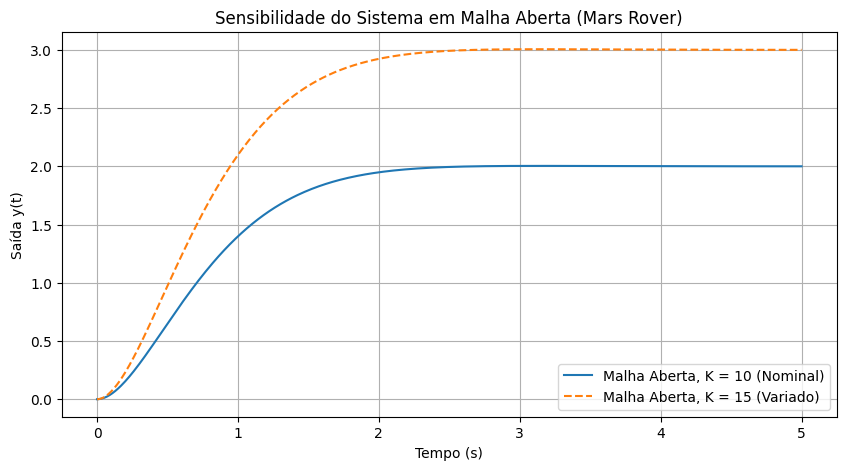

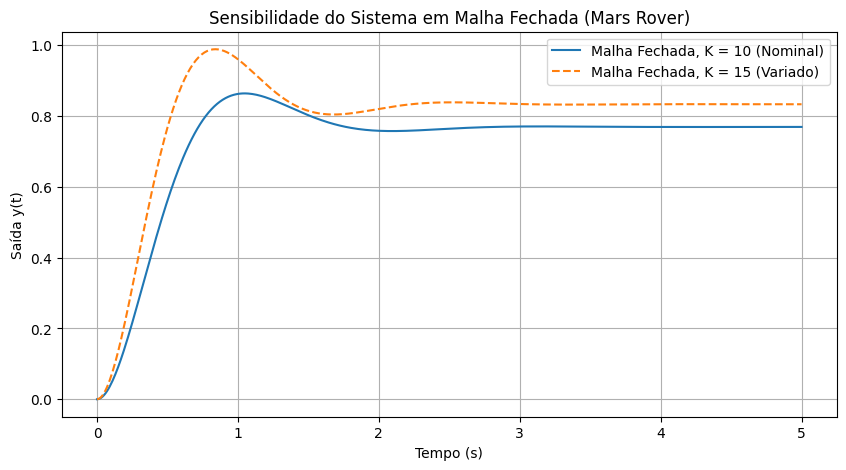

Malha Aberta: Variação de 50.00% no valor final.
Malha Fechada: Variação de 8.33% no valor final.


In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definição dos Ganhos e Tempo ---
K_nominal = 10.0
K_varied = 15.0 # Simula uma variação de 50% no ganho K
t_s = np.linspace(0, 5, 500)

# --- 2. Simulação Malha Aberta (To(s) = K / (s^2 + 4s + 5)) ---
To_nom = ctl.TransferFunction([K_nominal], [1, 4, 5])
To_var = ctl.TransferFunction([K_varied], [1, 4, 5])
t_nom_o, y_nom_o = ctl.step_response(To_nom, t_s)
t_var_o, y_var_o = ctl.step_response(To_var, t_s)

# --- 3. Simulação Malha Fechada (Tc(s) = K / (s^2 + 4s + 3 + K)) ---
Tc_nom = ctl.TransferFunction([K_nominal], [1, 4, 3 + K_nominal])
Tc_var = ctl.TransferFunction([K_varied], [1, 4, 3 + K_varied])
t_nom_c, y_nom_c = ctl.step_response(Tc_nom, t_s)
t_var_c, y_var_c = ctl.step_response(Tc_var, t_s)

# --- 4. Plotagem Malha Aberta (Alta Sensibilidade) ---
plt.figure(figsize=(10, 5))
plt.plot(t_nom_o, y_nom_o, label=f'Malha Aberta, K = {K_nominal:.0f} (Nominal)')
plt.plot(t_var_o, y_var_o, label=f'Malha Aberta, K = {K_varied:.0f} (Variado)', linestyle='--')
plt.title('Sensibilidade do Sistema em Malha Aberta (Mars Rover)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Plotagem Malha Fechada (Baixa Sensibilidade) ---
plt.figure(figsize=(10, 5))
plt.plot(t_nom_c, y_nom_c, label=f'Malha Fechada, K = {K_nominal:.0f} (Nominal)')
plt.plot(t_var_c, y_var_c, label=f'Malha Fechada, K = {K_varied:.0f} (Variado)', linestyle='--')
plt.title('Sensibilidade do Sistema em Malha Fechada (Mars Rover)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída y(t)')
plt.legend()
plt.grid(True)
plt.show()

# --- 6. Conclusão da Sensibilidade (Valores Finais) ---
print(f"Malha Aberta: Variação de {y_var_o[-1]/y_nom_o[-1] - 1:.2%} no valor final.")
print(f"Malha Fechada: Variação de {y_var_c[-1]/y_nom_c[-1] - 1:.2%} no valor final.")

## 4.9 Exemplo de Simulação: Rejeição a Distúrbios e Sensibilidade

Nesta seção, as vantagens da retroação são ilustradas através de simulações em um sistema de controle de velocidade (por exemplo, um motor de um AGV ou transportador industrial).

#### **Definição do Sistema Base**
Para as simulações, utilizamos um controlador proporcional $G_c(s) = K_c$ e uma planta de motor (Tipo 1):

* **Controlador (Proporcional):** $G_c(s) = K_c = 1$
* **Planta (Motor):** $G(s) = \frac{K_{planta}}{s(\tau s + 1)} = \frac{10}{s^2 + s}$ (onde $K_{planta}=10$ e $\tau=1$).
* **Malha Fechada (FT de Referência):** $T(s) = \frac{G_c G}{1 + G_c G} = \frac{10}{s^2 + s + 10}$

---

### **SIMULAÇÃO 1: Rejeição a Distúrbios**

O objetivo é verificar como o sistema em malha fechada se comporta quando um distúrbio indesejado $T_d(s)$ (como uma mudança abrupta de carga ou atrito) é aplicado na entrada da planta.

* **Função de Transferência de Distúrbio para Saída:**
    $$
    \frac{Y(s)}{T_d(s)} = \frac{G(s)}{1 + G_c(s)G(s)} = \frac{10}{s^2 + s + 10}
    $$
* **Análise:** O sistema em malha fechada rapidamente tenta corrigir o erro causado pelo distúrbio, minimizando o seu impacto sobre o valor de referência ($Y(s)$), o que é essencial em **Robótica Avançada** para manter a precisão sob condições operacionais variáveis.

---

### **SIMULAÇÃO 2: Redução de Sensibilidade**

O objetivo é demonstrar que a retroação torna o sistema menos sensível a variações nos parâmetros internos da planta (como um aumento de 50% no ganho $K_{planta}$ devido a um erro de calibração ou envelhecimento).

* **Análise da Sensibilidade:** No gráfico de **Malha Aberta**, o aumento de $50\%$ no ganho da planta leva a um aumento de $50\%$ no valor final da saída. No gráfico de **Malha Fechada**, a mesma perturbação no ganho da planta resulta em uma alteração mínima na saída final.
* **Aplicações:** Confirma a **Robustez** do controle, crucial para a confiabilidade de longo prazo de **Ativos da Indústria 4.0** (Manutenção Preditiva).

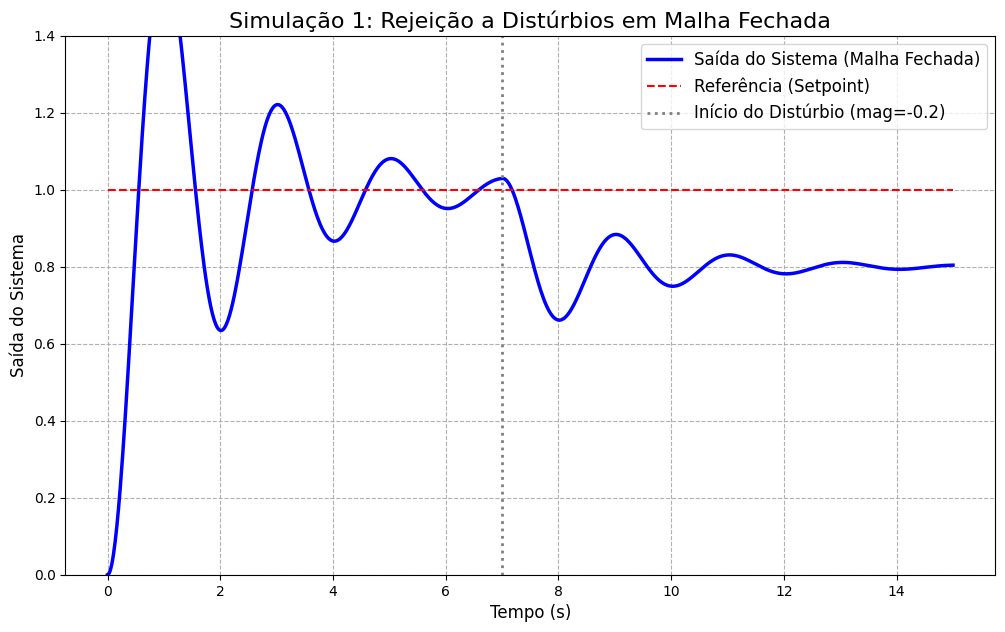


Análise do Gráfico (Rejeição a Distúrbios):
O sistema segue a referência (1.0). Em t=7s, o distúrbio de -0.2 causa um desvio, mas o controle (retroação) age rapidamente para rejeitar o distúrbio e restaurar o valor de referência, demonstrando a robustez da malha fechada.

Ganho nominal K_planta: 10.0, Ganho perturbado: 15.0


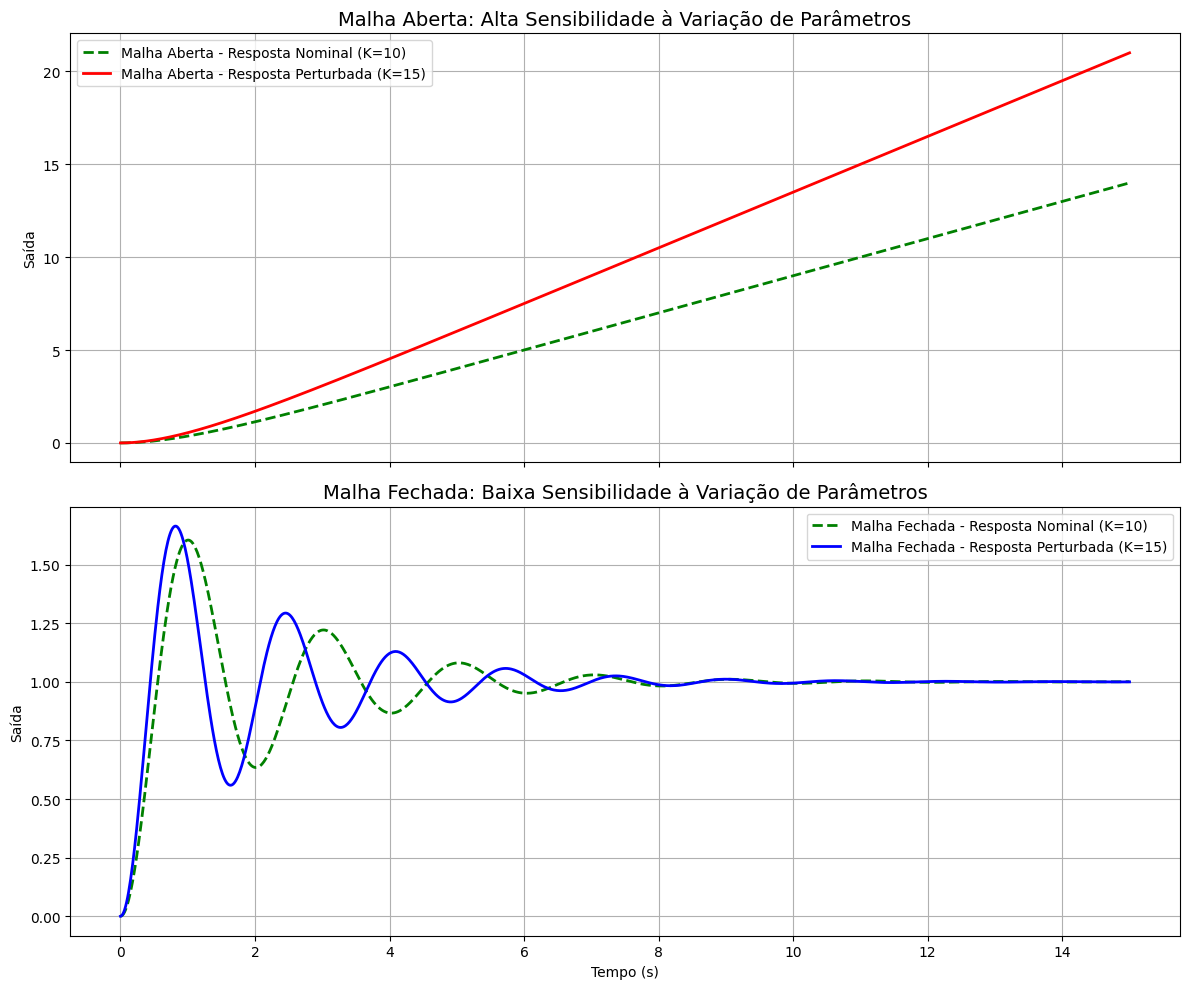


Análise dos Gráficos (Redução de Sensibilidade):
Malha Aberta (Variação no valor final): 50.0%
Malha Fechada (Variação no valor final): -0.1%
A retroação reduziu a variação de desempenho causada pela mudança interna do sistema.


In [4]:
# É essencial que a biblioteca python-control esteja instalada para rodar o código.
# Use o comando abaixo se necessário (remova o '#' se precisar executar a instalação).
# !pip install python-control

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- 1. DEFINIÇÃO DOS PARÂMETROS DO SISTEMA ---
# G(s) = K_planta / (s(tau*s + 1))
K_planta = 10.0
tau = 1.0
K_controlador = 1.0 # Controlador Proporcional Gc(s) = 1

# Planta: G(s) = 10 / (s^2 + s)
planta = ct.tf([K_planta], [tau, 1, 0])

# Controlador: Gc(s) = 1
controlador = ct.tf([K_controlador], [1])

# Tempo de simulação (usado em ambas as simulações)
t = np.linspace(0, 15, 1000)

# =========================================================
# --- SIMULAÇÃO 1: REJEIÇÃO A DISTÚRBIOS ---
# =========================================================

# Sistema T(s) = (Gc*G) / (1 + Gc*G)
sistema_mf = ct.feedback(controlador * planta, 1)

# Função de transferência do distúrbio: Y(s)/Td(s) = G / (1 + Gc*G)
tf_disturbio_mf = ct.feedback(planta, controlador)

# Entradas
ref = np.ones_like(t)
disturbio_t = 7
disturbio_mag = -0.2
disturbio = np.zeros_like(t)
disturbio[t >= disturbio_t] = disturbio_mag

# Resposta total (Superposição: Resposta à Referência + Resposta ao Distúrbio)
t_ref, y_ref = ct.forced_response(sistema_mf, T=t, U=ref)
t_dist, y_dist = ct.forced_response(tf_disturbio_mf, T=t, U=disturbio)
y_total = y_ref + y_dist

# --- Gráfico 1 ---
plt.figure(figsize=(12, 7))
plt.plot(t, y_total, label='Saída do Sistema (Malha Fechada)', color='blue', linewidth=2.5)
plt.plot(t, ref, 'r--', label='Referência (Setpoint)')
plt.axvline(x=disturbio_t, color='gray', linestyle=':', linewidth=2, label=f'Início do Distúrbio (mag={disturbio_mag})')
plt.title('Simulação 1: Rejeição a Distúrbios em Malha Fechada', fontsize=16)
plt.xlabel('Tempo (s)', fontsize=12)
plt.ylabel('Saída do Sistema', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--')
plt.ylim(0, 1.4)
plt.show()

print("\nAnálise do Gráfico (Rejeição a Distúrbios):")
print("O sistema segue a referência (1.0). Em t=7s, o distúrbio de -0.2 causa um desvio, mas o controle (retroação) age rapidamente para rejeitar o distúrbio e restaurar o valor de referência, demonstrando a robustez da malha fechada.")

# =========================================================
# --- SIMULAÇÃO 2: REDUÇÃO DE SENSIBILIDADE ---
# =========================================================

# 2.1 Planta Nominal e Perturbada
planta_nominal = planta
K_perturbado = K_planta * 1.5 # 50% de aumento no ganho da planta
planta_perturbada = ct.tf([K_perturbado], [tau, 1, 0])
print(f"\nGanho nominal K_planta: {K_planta}, Ganho perturbado: {K_perturbado}")

# 2.2 Simulação em Malha Aberta
# Controlador MA ajustado para que o valor final nominal seja 1: Gc = 1/K_planta
controlador_ma = ct.tf([1/K_planta], [1])
t_ma, y_ma_nominal = ct.step_response(controlador_ma * planta_nominal, T=t)
t_ma, y_ma_perturbada = ct.step_response(controlador_ma * planta_perturbada, T=t)

# 2.3 Simulação em Malha Fechada
sistema_mf_nominal = ct.feedback(controlador * planta_nominal, 1)
sistema_mf_perturbado = ct.feedback(controlador * planta_perturbada, 1)
t_mf, y_mf_nominal = ct.step_response(sistema_mf_nominal, T=t)
t_mf, y_mf_perturbada = ct.step_response(sistema_mf_perturbado, T=t)

# --- Gráficos Comparativos ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico para Malha Aberta
ax1.plot(t_ma, y_ma_nominal, 'g--', linewidth=2, label='Malha Aberta - Resposta Nominal (K=10)')
ax1.plot(t_ma, y_ma_perturbada, 'r-', linewidth=2, label='Malha Aberta - Resposta Perturbada (K=15)')
ax1.set_title('Malha Aberta: Alta Sensibilidade à Variação de Parâmetros', fontsize=14)
ax1.set_ylabel('Saída')
ax1.legend()
ax1.grid(True)

# Gráfico para Malha Fechada
ax2.plot(t_mf, y_mf_nominal, 'g--', linewidth=2, label='Malha Fechada - Resposta Nominal (K=10)')
ax2.plot(t_mf, y_mf_perturbada, 'b-', linewidth=2, label='Malha Fechada - Resposta Perturbada (K=15)')
ax2.set_title('Malha Fechada: Baixa Sensibilidade à Variação de Parâmetros', fontsize=14)
ax2.set_xlabel('Tempo (s)')
ax2.set_ylabel('Saída')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\nAnálise dos Gráficos (Redução de Sensibilidade):")
print(f"Malha Aberta (Variação no valor final): {(y_ma_perturbada[-1]/y_ma_nominal[-1] - 1)*100:.1f}%")
print(f"Malha Fechada (Variação no valor final): {(y_mf_perturbada[-1]/y_mf_nominal[-1] - 1)*100:.1f}%")
print("A retroação reduziu a variação de desempenho causada pela mudança interna do sistema.")